🔍 First few rows of the dataset:
   age  gender  heart_rate  systolic_blood_pressure  diastolic_blood_pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   blood_sugar  ck-mb  troponin    result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    -------

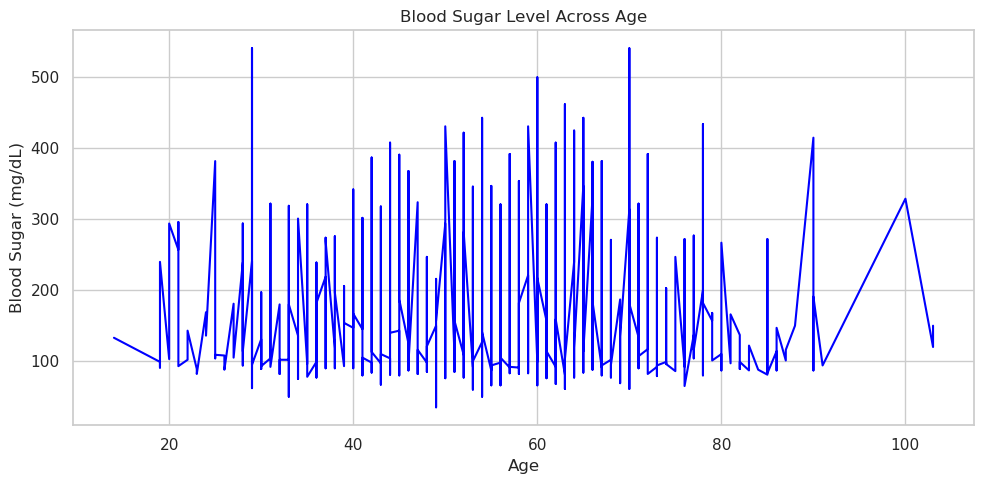

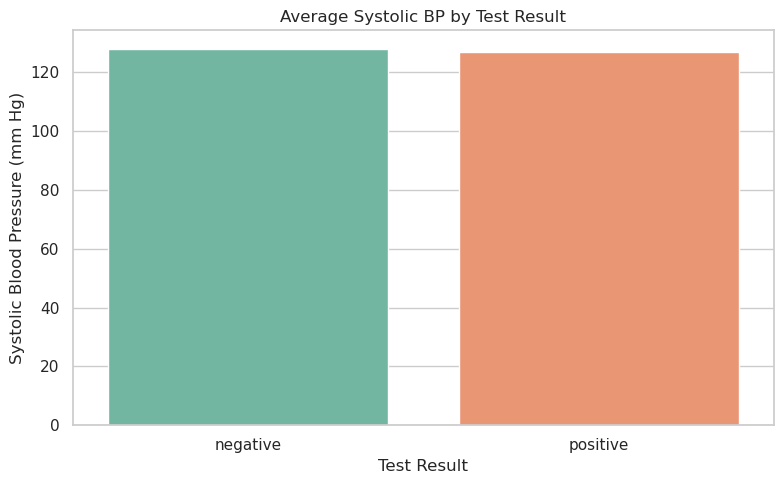

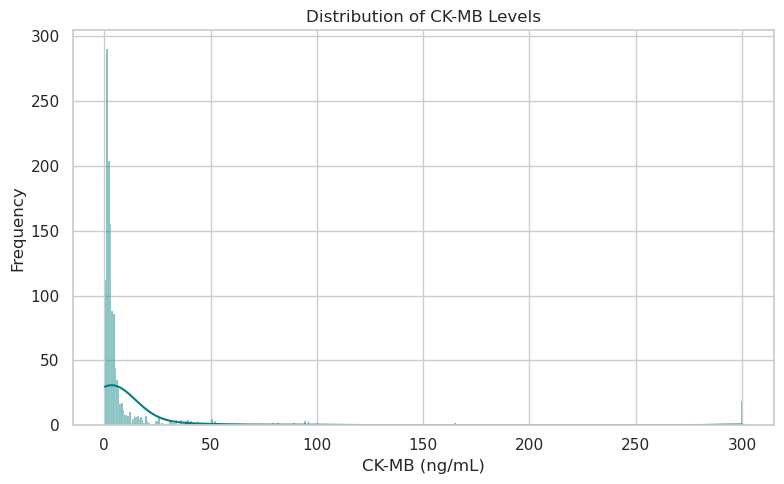

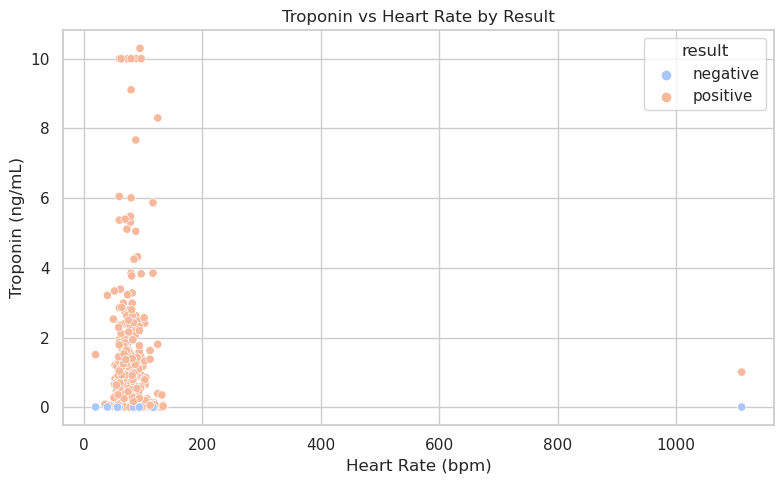

In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load and Explore the Dataset

try:
    # Load dataset
    df = pd.read_csv("Medicaldataset.csv")

    # Clean column names: lowercase and replace spaces with underscores
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Display structure of dataset: column types and null counts
    print("\n Dataset Info:")
    print(df.info())

    # Display missing values
    print("\n Missing Values:")
    print(df.isnull().sum())

    # Drop missing values (or use df.fillna(...) if you prefer to fill them)
    df_cleaned = df.dropna()
    print(f"\n Shape after cleaning: {df_cleaned.shape}")

except Exception as e:
    print("Error loading or cleaning the data:", e)

# Task 2: Basic Data Analysis

try:
    # Show basic statistics for numeric columns
    print("\n Basic Statistics:")
    print(df_cleaned.describe())

    # Group by the 'result' column (categorical), and get mean of numerical columns
    grouped = df_cleaned.groupby('result').mean(numeric_only=True)
    print("\n Grouped Means by Result:")
    print(grouped)

    # Identify potential pattern: is blood sugar higher in positives?
    print("\n Average Blood Sugar by Result:")
    print(grouped['blood_sugar'])

except Exception as e:
    print("Error during analysis:", e)

# Task 3: Data Visualization

try:
    sns.set(style="whitegrid")  # Optional styling

    # Line Chart: Blood sugar by age
    df_sorted = df_cleaned.sort_values('age')
    plt.figure(figsize=(10, 5))
    plt.plot(df_sorted['age'], df_sorted['blood_sugar'], color='blue')
    plt.title('Blood Sugar Level Across Age')
    plt.xlabel('Age')
    plt.ylabel('Blood Sugar (mg/dL)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Bar Chart: Average systolic BP per test result
    bar_data = df_cleaned.groupby('result')['systolic_blood_pressure'].mean().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=bar_data, x='result', y='systolic_blood_pressure', palette='Set2')
    plt.title('Average Systolic BP by Test Result')
    plt.xlabel('Test Result')
    plt.ylabel('Systolic Blood Pressure (mm Hg)')
    plt.tight_layout()
    plt.show()

    # Histogram: CK-MB levels
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned['ck-mb'], kde=True, color='teal')
    plt.title('Distribution of CK-MB Levels')
    plt.xlabel('CK-MB (ng/mL)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Scatter Plot: Heart rate vs Troponin, colored by test result
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_cleaned, x='heart_rate', y='troponin', hue='result', palette='coolwarm')
    plt.title('Troponin vs Heart Rate by Result')
    plt.xlabel('Heart Rate (bpm)')
    plt.ylabel('Troponin (ng/mL)')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error during visualization:", e)